# Modules EXPERT

Esta tabla contiene la información a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'PROFESSIONAL'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "PROFESSIONAL"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for PROFESSIONAL class.")

2025-01-26 11:36:06.144692 Data cache files found ...
2025-01-26 11:36:06.160317 Data cache files successfully loaded!!
The dataset contains 3915 (49.31%) instances for BEGINNER class and 4024 (50.69%) for PROFESSIONAL class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 PROFESSIONAL CLASS Features shape: (4024, 13)
As we can see the downloaded data contains a total of 4024 instances of PROFESSIONAL. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              4024 non-null   object 
 1   module__has_doc_string               4024 non-null   bool   
 2   module__global_stmts_pct             4024 non-null   float64
 3   module__global_expressions_pct       4024 non-null   float64
 4   module__number_of_classes            4024 non-null   int64  
 5   module__number_of_functions          4024 non-null   int64  
 6   module__class_defs_pct               4024 non-null   float64
 7   module__function_defs_pct            4024 non-null   float64
 8   module__enum_defs_pct                4024 non-null   float64
 9   module__average_stmts_function_body  4024 non-null   float64
 10  module__average_stmts_method_body    4024 non-null   float64
 11  module__type_annotations_pct       

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y una de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [5]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,4024,3,SnakeCase,2565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,4024,2,False,2743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,4024.0,NaN,NaN,NaN,0.141378,0.196797,0.0,0.0,0.045455,0.214286,1.0
module__global_expressions_pct,4024.0,NaN,NaN,NaN,0.064467,0.166364,0.0,0.0,0.0,0.071429,1.0
module__number_of_classes,4024.0,NaN,NaN,NaN,0.779076,1.344713,0.0,0.0,0.0,1.0,25.0
module__number_of_functions,4024.0,NaN,NaN,NaN,1.29001,3.053038,0.0,0.0,0.0,1.0,59.0
module__class_defs_pct,4024.0,NaN,NaN,NaN,0.400449,0.459621,0.0,0.0,0.0,1.0,1.0
module__function_defs_pct,4024.0,NaN,NaN,NaN,0.352205,0.449149,0.0,0.0,0.0,1.0,1.0
module__enum_defs_pct,4024.0,NaN,NaN,NaN,0.011015,0.082441,0.0,0.0,0.0,0.0,1.0
module__average_stmts_function_body,4024.0,NaN,NaN,NaN,1.974248,3.525114,0.0,0.0,0.0,3.0,39.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.0
    "module__number_of_classes": [(0, 0), (1, 1), (1,inf)],  # min: 0 max: 113
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 258
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, inf)], #min: 0.0 max: 53.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 114.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   2100   52.186879
             [1.0_1.0]   1358   33.747515
             [0.0_1.0)    566   14.065606

module__function_defs_pct  count  percentage
                [0.0_0.0]   2379   59.120278
                [1.0_1.0]   1128   28.031809
                [0.0_1.0)    517   12.847913

module__enum_defs_pct  count  percentage
            [0.0_0.0]   3927   97.589463
            [0.0_inf]     97    2.410537

module__number_of_classes  count  percentage
                    [0_0]   2100   52.186879
                    [1_1]   1385   34.418489
                  [1_inf]    539   13.394632

module__number_of_functions  count  percentage
                      [0_0]   2379   59.120278
                    [0_inf]   1645   40.879722

module__type_annotations_pct  count  percentage
                   [0.0_inf]   2060   51.192843
                   [0.0_0.0]   1964   48.807157

module__average_stmts_function_body

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (4024, 15)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

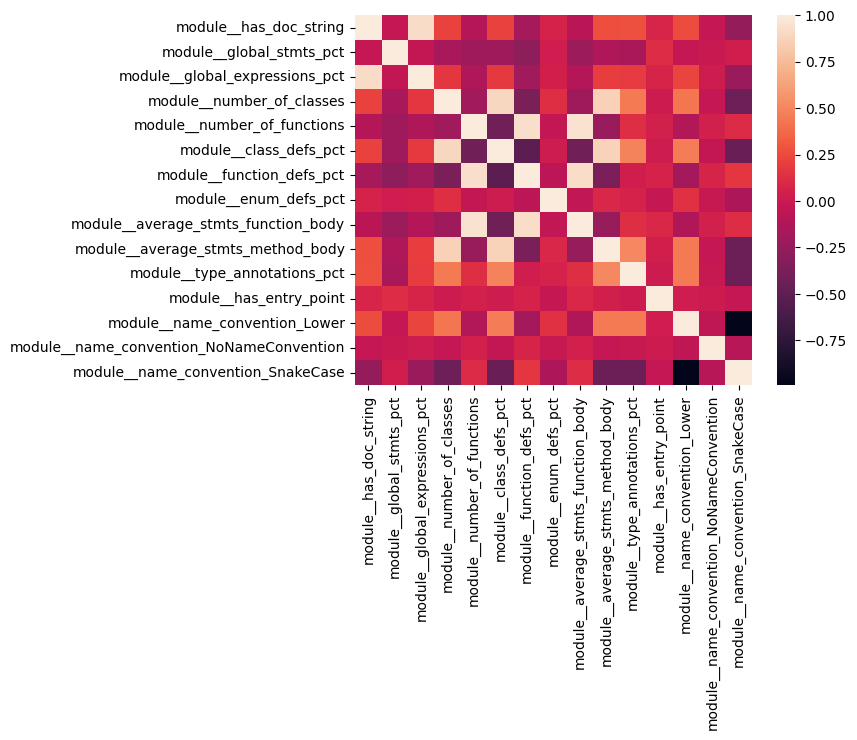

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

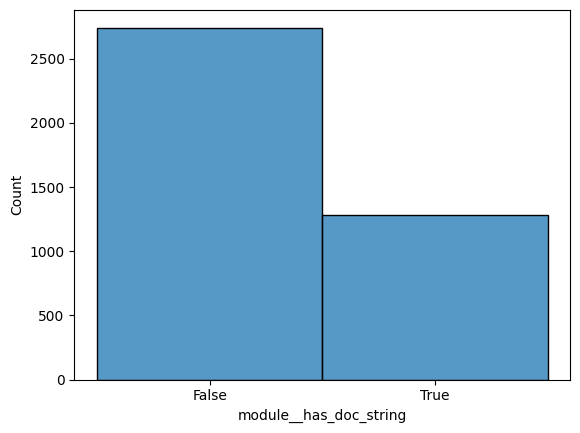

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [11]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 1281 valores verdaderos y 2743 valores falsos. Y, la desviación típica es de 0.4658900797367096
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.3183399602385686.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6816600397614314.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 68.17% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 31.83% de los items.


In [13]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,1281.0,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,1.0,0.110863,0.192156,1.036690,1.227166,0.541836,0.236920,0.015936,1.936802,2.688324,0.389950,0.043716,0.537080,0.001561,0.461358
std,0.0,0.156092,0.247271,1.327967,3.262823,0.455139,0.378656,0.093369,3.716659,2.536825,0.279018,0.204542,0.498818,0.039498,0.498699
min,1.0,0.000000,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.062500,0.111111,1.000000,0.000000,0.600000,0.000000,0.000000,0.000000,2.736842,0.500000,0.000000,1.000000,0.000000,0.000000
75%,1.0,0.166667,0.166667,1.000000,1.000000,1.000000,0.500000,0.000000,3.000000,4.500000,0.615385,0.000000,1.000000,0.000000,1.000000
max,1.0,0.987805,1.000000,11.000000,49.000000,1.000000,1.000000,1.000000,29.666666,17.000000,0.888889,1.000000,1.000000,1.000000,1.000000


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

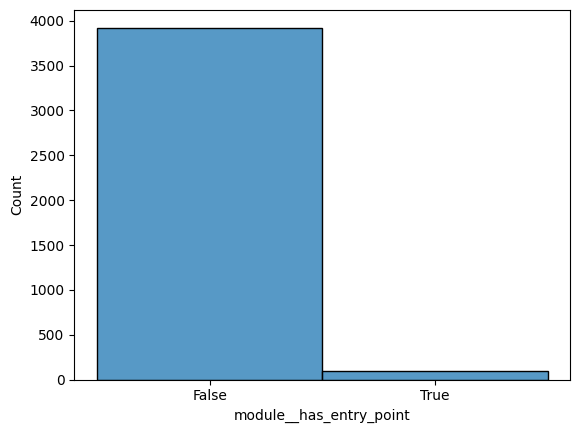

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 101 valores verdaderos y 3923 valores falsos. Y, la desviación típica es de 0.15644650161266327
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.02509940357852883.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.9749005964214712.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 97.49% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 2.51% de los items.


In [17]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.0,101.000000,101.000000,101.000000
mean,0.554455,0.189651,0.057718,0.732673,1.762376,0.440128,0.520268,0.0,5.277619,2.742475,0.290437,1.0,0.435644,0.009901,0.554455
std,0.499505,0.113966,0.054945,1.018735,3.388653,0.466870,0.470290,0.0,7.418705,3.215599,0.293122,0.0,0.498314,0.099504,0.499505
min,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,1.000000,0.166667,0.062500,1.000000,1.000000,0.250000,0.500000,0.0,4.500000,2.230769,0.235294,1.0,0.000000,0.000000,1.000000
75%,1.000000,0.222222,0.111111,1.000000,2.000000,1.000000,1.000000,0.0,7.000000,5.000000,0.555556,1.0,1.000000,0.000000,1.000000
max,1.000000,0.642857,0.166667,6.000000,20.000000,1.000000,1.000000,0.0,39.000000,15.000000,1.000000,1.0,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 25. Con una media de 0.779.

<Axes: ylabel='module__number_of_classes'>

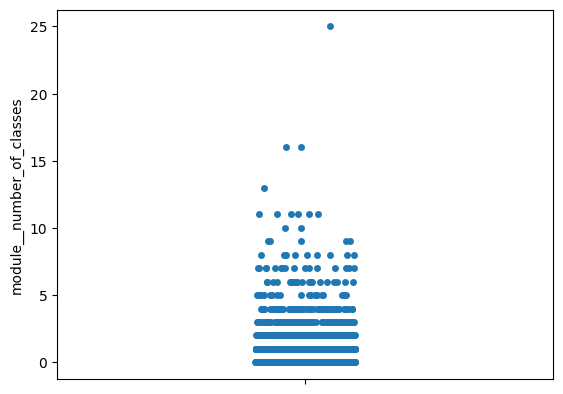

In [18]:
sns.stripplot(X['module__number_of_classes'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [19]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7691303298042083
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.10162242535384923,33.52426503848611]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 248 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 6.163% del total de instancias.
+3.0IQR: 83 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 2.063% del total de instancias.
L: 0 instancias tienen 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 4 (Con un MC de 76 usamos Tukey Extremo)

In [54]:
X[X['module__number_of_classes'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000
mean,0.469880,0.107968,0.025828,7.349398,2.795181,0.801837,0.165214,0.032949,1.531479,4.152785,0.261014,0.024096,0.481928,0.0,0.518072
std,0.502126,0.117547,0.026446,3.042118,5.523252,0.217714,0.227050,0.076503,2.076276,3.105488,0.233383,0.154281,0.502711,0.0,0.502711
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.138889,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,5.500000,0.000000,0.677083,0.000000,0.000000,0.000000,2.225774,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.083333,0.022727,7.000000,0.000000,0.857143,0.000000,0.000000,0.000000,3.558140,0.294118,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.160000,0.047247,8.000000,3.000000,1.000000,0.322917,0.000000,2.884615,4.525000,0.472756,0.000000,1.000000,0.0,1.000000
max,1.000000,0.622642,0.090909,25.000000,31.000000,1.000000,0.861111,0.250000,8.000000,18.600000,0.738462,1.000000,1.000000,0.0,1.000000


### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 59. Con una media de 1.29.

<Axes: ylabel='module__number_of_functions'>

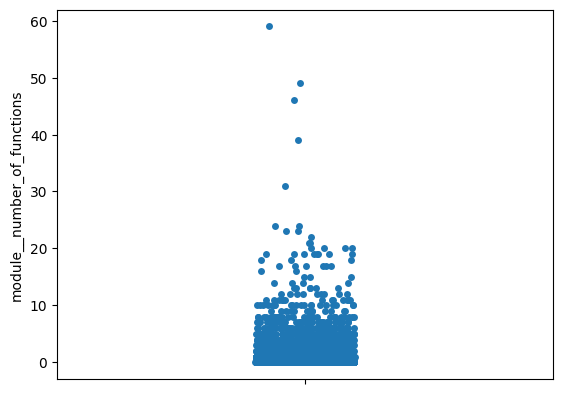

In [21]:
sns.stripplot(X['module__number_of_functions'])

In [22]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.909963685424293
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.062075258028374436,58.129455957540415]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -3.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -1.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 612 instancias tienen un valor para module__number_of_functions superior a 2.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 15.21% del total de instancias.
+3.0IQR: 345 instancias tienen un valor para module__number_of_functions superior a 4.0 (Q3-3*IQR) para module__number_of_functions. Representando un 8.574% del total de instancias.
L: 0 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 58 (Con un MC de 90 usamos U)

In [55]:
X[X['module__number_of_functions'] > 58].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,1.0,1.000000,1.00000,1.0,1.0,1.0000,1.000000,1.000000,1.000000,1.00,1.000000,1.0,1.0,1.0,1.0
mean,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0
25%,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0
50%,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0
75%,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0
max,0.0,0.141593,0.00885,4.0,59.0,0.0625,0.921875,0.015625,1.762712,7.25,0.008403,0.0,1.0,0.0,0.0


### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 39. Con una media de 1.97.

<Axes: ylabel='module__average_stmts_function_body'>

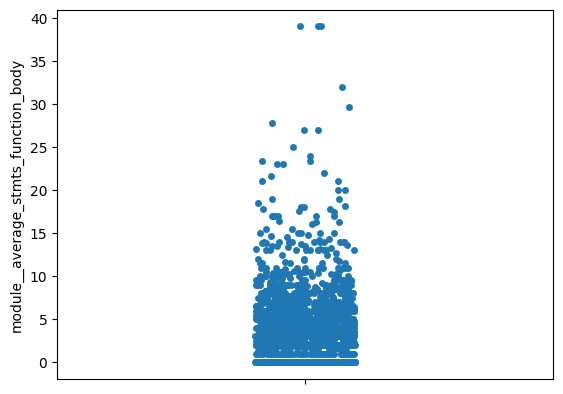

In [24]:
sns.stripplot(X['module__average_stmts_function_body'])

In [25]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6055244847933787
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5405012657996876,53.712647442610276]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -9.0 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -4.5 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 271 instancias tienen un valor para module__average_stmts_function_body superior a 7.5 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 6.735% del total de instancias.
+3.0IQR: 86 instancias tienen un valor para module__average_stmts_function_body superior a 12.0 (Q3-3*IQR) para module__average_stmts_funct

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 12 (Con un MC de 60 usamos Tukey Extremo)

In [56]:
X[X['module__average_stmts_function_body'] > 12].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.395349,0.048633,0.051349,0.453488,2.662791,0.122960,0.873718,0.003322,17.566080,1.314707,0.317652,0.093023,0.139535,0.011628,0.848837
std,0.491793,0.119761,0.066080,0.889904,2.150844,0.221578,0.230350,0.030809,5.948690,2.992243,0.320144,0.292169,0.348536,0.107833,0.360308
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.142857,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.839286,0.000000,13.770833,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.042727,0.000000,2.000000,0.000000,1.000000,0.000000,15.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.058824,0.083333,1.000000,4.000000,0.160714,1.000000,0.000000,18.875000,1.050000,0.625000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.696970,0.333333,4.000000,13.000000,0.750000,1.000000,0.285714,39.000000,14.928572,0.875000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 28. Con una media de 1.89.

<Axes: ylabel='module__average_stmts_method_body'>

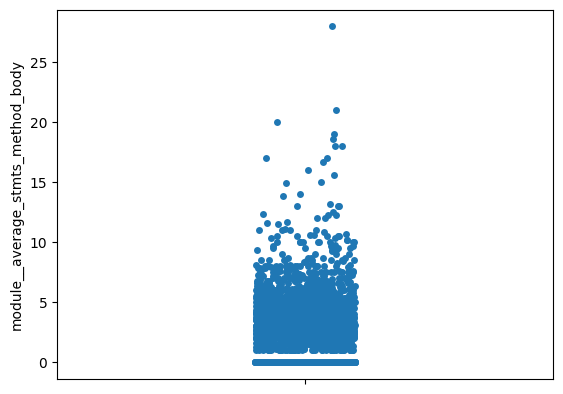

In [27]:
sns.stripplot(X['module__average_stmts_method_body'])

In [28]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.679424654582478
Rango valores atípicos extremos (Tukey): [-10.200000286102295,13.600000381469727]
Rango valores atípicos leves (Tukey): [-5.1000001430511475,8.500000238418579]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.47295940284259724,80.64167842673545]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -10.200000286102295 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -5.1000001430511475 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 77 instancias tienen un valor para module__average_stmts_method_body superior a 8.500000238418579 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 1.914% del total de instancias.
+3.0IQR: 16 instancias tienen un valor para module_

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13.6 (Con un MC de 67 usamos Tukey Extremo)

In [29]:
X[X['module__average_stmts_method_body'] > 13.6].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

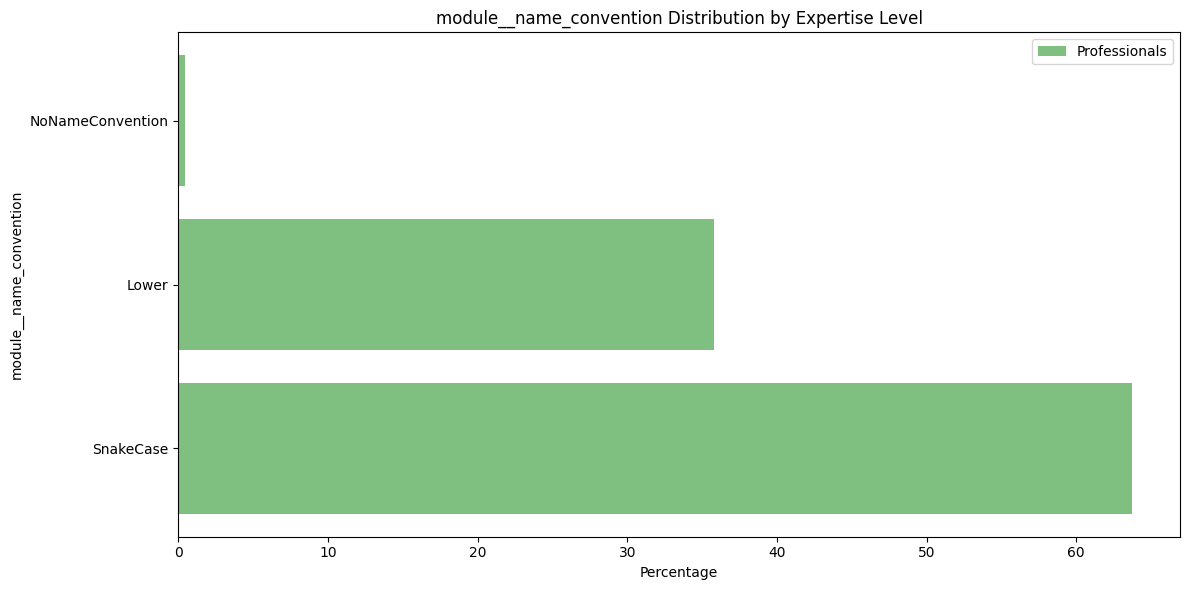

In [30]:
print_categorical_histogram(full_table, 'module__name_convention','module__expertise_level', include_all=False,include_beginners=False)

In [31]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 3 valores distintos.
El umbral de outlier es de 0.06666666666666667%
La variable module__name_convention toma el valor de SnakeCase en un 63.74% de los items.
La variable module__name_convention toma el valor de Lower en un 35.79% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 0.4722% de los items.


In [32]:
print_values_usage_for_cat_var(full_table, 'module__name_convention', NAMING_CONVENTION_VALUES)

La variable module__name_convention puede tomar 7 valores distintos
	3 (42.86%) valores utilizados
	4 (57.14%) valores NO utilizados
		La variable module__name_convention nunca toma valor CamelUp.
		La variable module__name_convention nunca toma valor CamelLow.
		La variable module__name_convention nunca toma valor Discard.
		La variable module__name_convention nunca toma valor Upper.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.14.

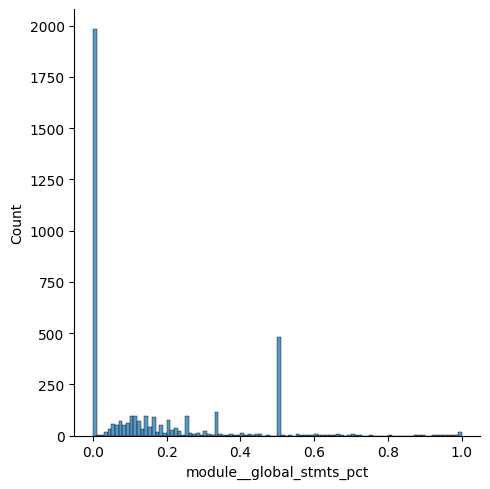

In [33]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4508468444737736
Rango valores atípicos extremos (Tukey): [-0.6428571492433548,0.8571428656578064]
Rango valores atípicos leves (Tukey): [-0.3214285746216774,0.535714291036129]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0663412184713454,2.1654133030104368]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.6428571492433548 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.3214285746216774 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 97 instancias tienen un valor para module__global_stmts_pct superior a 0.535714291036129 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 2.411% del total de instancias.
+3.0IQR: 32 instancias tienen un valor para module__global_stmts_pct superior a 0.8571428656578064 (Q3-3

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.53 (Con un MC de 45 usamos Tuckey)

In [61]:
X[X['module__global_stmts_pct'] > 0.53571429].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000
mean,0.350515,0.748671,0.058872,0.298969,0.422680,0.129627,0.128105,0.0,0.850086,0.607189,0.095377,0.020619,0.721649,0.0,0.278351
std,0.479610,0.161912,0.079764,0.868007,1.412998,0.320366,0.318580,0.0,2.766396,1.624878,0.216659,0.142842,0.450515,0.0,0.450515
min,0.000000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.615385,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.700000,0.021739,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,1.000000,0.923077,0.107143,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000
max,1.000000,1.000000,0.333333,5.000000,9.000000,1.000000,1.000000,0.0,17.000000,7.500000,0.666667,1.000000,1.000000,0.0,1.000000


### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.064.

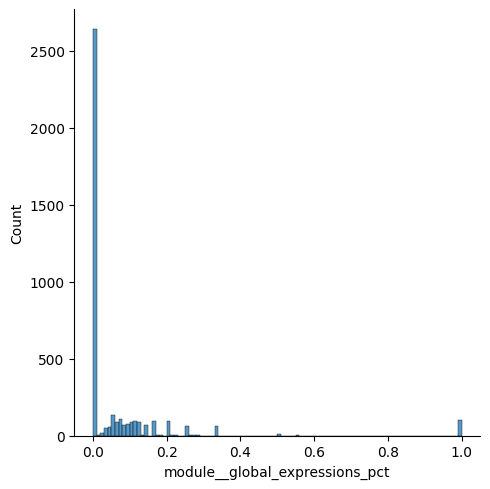

In [36]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [37]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8641048669815063
Rango valores atípicos extremos (Tukey): [-0.2142857238650322,0.2857142984867096]
Rango valores atípicos leves (Tukey): [-0.1071428619325161,0.1785714365541935]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.005205918064300387,3.4682064246894986]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.2142857238650322 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.1071428619325161 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 344 instancias tienen un valor para module__global_expressions_pct superior a 0.1785714365541935 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 8.549% del total de instancias.
+3.0IQR: 177 instancias tienen un valor para module__global_exp

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.2857 (Con un MC de 86 usamos Tuckey Extremo)

In [63]:
X[X['module__global_expressions_pct'] > 0.285714298].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000
mean,0.977401,0.105443,0.718770,0.062147,0.062147,0.062147,0.056497,0.033898,0.333333,0.087268,0.023944,0.0,0.146893,0.005650,0.847458
std,0.149042,0.172199,0.320576,0.242107,0.264536,0.242107,0.231534,0.181481,2.175971,0.433368,0.107780,0.0,0.355003,0.075165,0.360566
min,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,1.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1.000000,0.666667,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,27.000000,3.000000,0.666667,0.0,1.000000,1.000000,1.000000


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.40. 

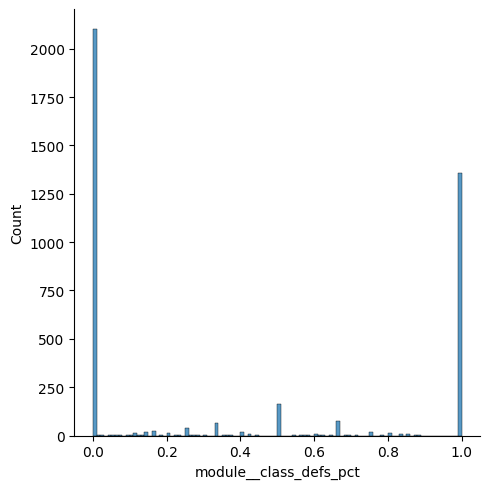

In [39]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.1399303674697876
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.9191635768806984,3.6252774297616854]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -3.0 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 4.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__class_def

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [41]:
X[(X['module__class_defs_pct'] > 0.0) & (X['module__class_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,0.452297,0.096826,0.035964,2.189046,3.263251,0.447712,0.505603,0.046684,4.451214,4.076100,0.404534,0.026502,0.503534,0.005300,0.491166
std,0.498159,0.109612,0.042708,2.159471,5.123912,0.204798,0.252525,0.131480,3.709793,2.760652,0.251840,0.160764,0.500430,0.072675,0.500364
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.275862,0.333333,0.000000,2.000000,2.250000,0.166667,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.076923,0.015419,1.000000,2.000000,0.500000,0.500000,0.000000,3.833333,3.666667,0.500000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.152885,0.066667,2.000000,4.000000,0.600000,0.666667,0.000000,6.000000,5.222222,0.604587,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.705882,0.250000,25.000000,59.000000,0.888889,0.980000,0.750000,27.000000,21.000000,0.866667,1.000000,1.000000,1.000000,1.000000


### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.35

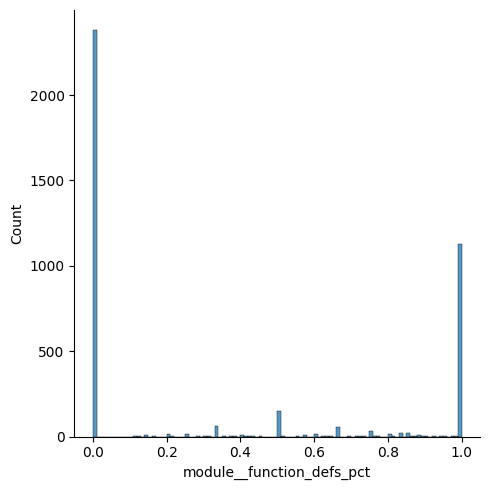

In [42]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [43]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.19864633679389954
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.7484154276105413,4.32028444440415]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [44]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.446809,0.096687,0.036031,2.087041,3.593811,0.425744,0.559519,0.014736,4.915643,4.095918,0.396913,0.029014,0.475822,0.005803,0.518375
std,0.497644,0.110604,0.042757,2.083101,5.249345,0.204898,0.201235,0.070063,3.586454,2.856177,0.256079,0.168007,0.499899,0.076028,0.500146
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.250000,0.428571,0.000000,2.600000,2.250000,0.147059,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.076923,0.000000,1.000000,2.000000,0.500000,0.500000,0.000000,4.000000,3.666667,0.500000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.150000,0.071429,2.000000,4.000000,0.500000,0.730769,0.000000,6.000000,5.333333,0.600000,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.705882,0.222222,25.000000,59.000000,0.888889,0.980000,0.500000,27.000000,21.000000,0.870968,1.000000,1.000000,1.000000,1.000000


### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 0.1. Su media es 0.011.

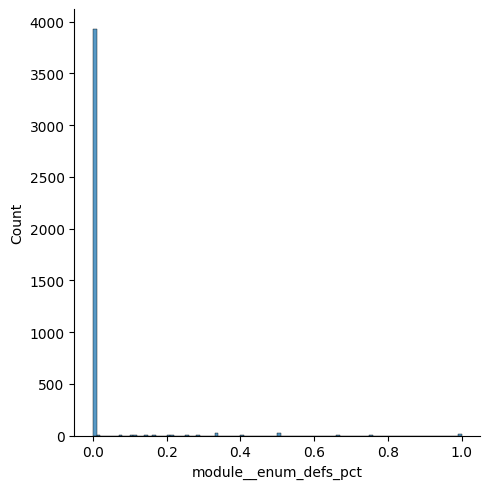

In [45]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9276889155511154
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 97 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 2.411% del total de instancias.
+3.0IQR: 97 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 2.411% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__enum

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [47]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.0,97.000000
mean,0.505155,0.120554,0.049778,2.134021,1.422680,0.407272,0.135786,0.456942,1.018935,2.905774,0.395935,0.0,0.793814,0.0,0.206186
std,0.502571,0.111669,0.081634,2.510930,6.207917,0.286965,0.241626,0.280950,2.223331,2.047175,0.268555,0.0,0.406667,0.0,0.406667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.000000,0.250000,0.000000,1.875000,0.008403,0.0,1.000000,0.0,0.000000
50%,1.000000,0.100000,0.038462,1.000000,0.000000,0.500000,0.000000,0.333333,0.000000,3.000000,0.482759,0.0,1.000000,0.0,0.000000
75%,1.000000,0.200000,0.055556,2.000000,1.000000,0.666667,0.166667,0.500000,1.000000,4.333333,0.613636,0.0,1.000000,0.0,0.000000
max,1.000000,0.454545,0.333333,11.000000,59.000000,0.857143,0.921875,1.000000,15.000000,7.952381,0.870968,0.0,1.000000,0.0,1.000000


### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 1. Su media es 0.27.

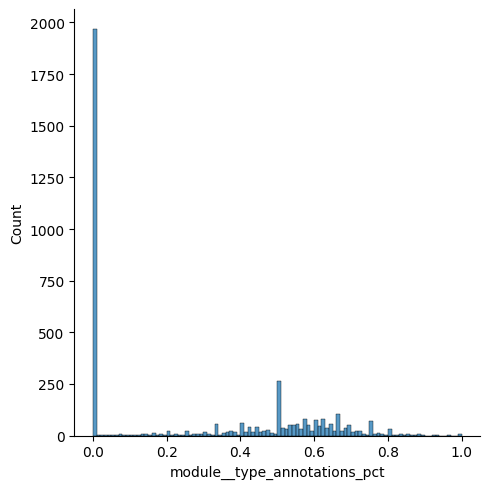

In [48]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.43180379271507263
Rango valores atípicos extremos (Tukey): [-1.6666667461395264,2.222222328186035]
Rango valores atípicos leves (Tukey): [-0.8333333730697632,1.388888955116272]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.1838500528792869,5.24302872487433]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -1.6666667461395264 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a -0.8333333730697632 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 1.388888955116272 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct superior a 2.

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.38 (Con un MC de 43 usamos Tukey)

In [50]:
X[X['module__type_annotations_pct'] > 1.38].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase
count,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000
mean,0.446602,0.084548,0.048250,1.162136,1.666990,0.636607,0.350226,0.013167,2.371941,2.946695,0.536883,0.028641,0.575243,0.004369,0.420388
std,0.497261,0.116825,0.063590,1.389240,3.413509,0.431079,0.431633,0.078615,3.786221,2.380982,0.165489,0.166835,0.494426,0.065969,0.493741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003306,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.111111,0.000000,0.000000,0.000000,1.000000,0.451542,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.040000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.548387,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.142857,0.083333,1.000000,2.000000,1.000000,0.857143,0.000000,4.000000,4.375000,0.647059,0.000000,1.000000,0.000000,1.000000
max,1.000000,0.870968,0.333333,25.000000,59.000000,1.000000,1.000000,1.000000,39.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 40% de los modulos tienen anotaciones de tipo.

## Multivariate

Isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
153,SnakeCase,False,0.218750,0.046875,7,19,0.269231,0.730769,0.0,2.263158,16.714285,0.0,False,PROFESSIONAL
185,SnakeCase,True,0.428571,0.071429,1,2,0.333333,0.666667,0.0,13.000000,5.000000,0.0,True,PROFESSIONAL
212,SnakeCase,True,0.117647,0.029412,2,17,0.105263,0.894737,0.0,5.764706,2.375000,0.0,True,PROFESSIONAL
344,Lower,True,0.338983,0.016949,2,23,0.080000,0.920000,0.0,6.478261,11.125000,0.0,False,PROFESSIONAL
397,Lower,True,0.103448,0.017241,5,31,0.138889,0.861111,0.0,5.838710,3.681818,0.0,False,PROFESSIONAL


### IMPORTANTE
Analizar los 14 resultados obtenidos.

In [52]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include=['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,5.0,0.800000,0.447214,0.000000,1.000000,1.000000,1.000000,1.000000
module__global_stmts_pct,5.0,0.241480,0.140903,0.103448,0.117647,0.218750,0.338983,0.428571
module__global_expressions_pct,5.0,0.036381,0.023081,0.016949,0.017241,0.029412,0.046875,0.071429
module__number_of_classes,5.0,3.400000,2.509980,1.000000,2.000000,2.000000,5.000000,7.000000
module__number_of_functions,5.0,18.400000,10.620734,2.000000,17.000000,19.000000,23.000000,31.000000
module__class_defs_pct,5.0,0.185343,0.110234,0.080000,0.105263,0.138889,0.269231,0.333333
module__function_defs_pct,5.0,0.814657,0.110234,0.666667,0.730769,0.861111,0.894737,0.920000
module__enum_defs_pct,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
module__average_stmts_function_body,5.0,6.668967,3.906294,2.263158,5.764706,5.838710,6.478261,13.000000
module__average_stmts_method_body,5.0,7.779222,6.015563,2.375000,3.681818,5.000000,11.125000,16.714285


In [53]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include=['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,4019.0,0.317741,0.465656,0.0,0.0,0.000000,1.000000,1.0
module__global_stmts_pct,4019.0,0.141253,0.196838,0.0,0.0,0.043478,0.214286,1.0
module__global_expressions_pct,4019.0,0.064501,0.166463,0.0,0.0,0.000000,0.071429,1.0
module__number_of_classes,4019.0,0.775815,1.340027,0.0,0.0,0.000000,1.000000,25.0
module__number_of_functions,4019.0,1.268724,2.975835,0.0,0.0,0.000000,1.000000,59.0
module__class_defs_pct,4019.0,0.400716,0.459831,0.0,0.0,0.000000,1.000000,1.0
module__function_defs_pct,4019.0,0.351629,0.449118,0.0,0.0,0.000000,1.000000,1.0
module__enum_defs_pct,4019.0,0.011028,0.082492,0.0,0.0,0.000000,0.000000,1.0
module__average_stmts_function_body,4019.0,1.968407,3.521255,0.0,0.0,0.000000,3.000000,39.0
module__average_stmts_method_body,4019.0,1.888102,2.604051,0.0,0.0,0.000000,3.377493,28.0
